In [1]:
import nbimporter
import pandas as pd
import math
#import ace_tools as tools

In [2]:
from graph_utilities import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from graph_utilities import generate_cyclic_graph, generate_chain_graph, generate_spider_graph
from mtd_math import solver, solveur_gbp, solveur_gbp_dico
from algo_recherche import recherche_profondeur, recherche_largeur, couverture_balle

In [3]:
# 10 sommets (3.16)
#fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
#fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
#fichier = r'instances\karate\karate.mtx'

# 62 sommets (7.87)
#fichier = r'instances\dolphins\dolphins.mtx'

# 105 sommets (12.88)
#fichier = r'instances\polbooks\polbooks.mtx'

# 258 sommets (16.06)
#fichier = r'instances\sphere3\sphere3.mtx'

# 379 sommets (19.47)
#fichier = r'instances\ca-netscience\ca-netscience.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

#graphe = lire_graphe(fichier)

In [4]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
#graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

In [5]:
#afficher_graphe(graphe)

---

In [24]:
# Définition des graphes à tester
graphes = {
    "Stranke94": lire_graphe(r'instances/Stranke94/Stranke94.mtx'),
    "mouse_visual-cortex_1": lire_graphe(r'instances/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.mtx'),
    "karate": lire_graphe(r'instances/karate/karate.mtx'),
    #"dolphins": lire_graphe(r'instances/dolphins/dolphins.mtx'),
    #"polbooks": lire_graphe(r'instances/polbooks/polbooks.mtx'),
    #"sphere3": lire_graphe(r'instances/sphere3/sphere3.mtx'),
    #"ca-netscience": lire_graphe(r'instances/ca-netscience/ca-netscience.mtx'),
    "Graphe Cycle_16": generate_cyclic_graph(16),
    "Graphe Cycle_18": generate_cyclic_graph(18),
    "Graphe Chaine_7": generate_chain_graph(7),
    "Graphe Chaine_16": generate_chain_graph(16),
    "Graphe Chaine_18": generate_chain_graph(18),
    "Graphe Etoile_16": generate_spider_graph(0, leg_length=5, num_legs=3),
    "Graphe Etoile_21": generate_spider_graph(0, leg_length=4, num_legs=5),
}

In [23]:
couverture_balle(generate_chain_graph(7))

[(4, 3), (1, 2)]

In [25]:
# Initialisation du tableau des résultats
resultats = []

# Parcours de chaque graphe
for nom, graphe in graphes.items():
    nb_sommets = len(graphe)
    nb_aretes = sum(len(v) for v in graphe.values()) // 2  # Division par 2 car graphe non orienté
    k = nb_sommets ** 0.5

    try:
        solver_result, cout_s = solver(graphe)
    except Exception as e:
        solver_result, cout_s = str(e)

    try:
        chemin, cout_ss  = solveur_gbp(graphe)
    except Exception as e:
        B, chemin = None, str(e)

    try:
        sommets_actifs_d, cout_d = solveur_gbp_dico(graphe)
    except Exception as e:
        sommets_actifs_d, cout_d = str(e), None

    try:
        sommets_actifs_l, cout_l = recherche_largeur(graphe)
    except Exception as e:
        sommets_actifs_l, cout_l = str(e), None

    try:
        sequence_opt = couverture_balle(graphe)
        cout_bb = max([rayon for centre, rayon in sequence_opt])
    except Exception as e:
        sequence_opt = str(e)
    
    # Ajout des résultats au tableau
    resultats.append({
        "Graphe": nom,
        "V": nb_sommets,
        "E(V)+1": k,
        "B_max": math.ceil(k),
        "Solveur 1": solver_result,
        "Cout S1": cout_s,
        "Solveur GBP": chemin,
        "Cout S2": cout_ss,
        "Solveur dico": sommets_actifs_d,
        "Cout": cout_d,
        "Recherche Largeur": sommets_actifs_l,
        "Cout RL": cout_l,
        "Couverture des balles": sequence_opt,
        "Cout CB": cout_bb
    })


# Convertir en DataFrame et afficher
df = pd.DataFrame(resultats)

df

,Graphe,V,E(V)+1,B_max,Solveur 1,Cout S1,Solveur GBP,Cout S2,Solveur dico,Cout,Recherche Largeur,Cout RL,Couverture des balles,Cout CB
0,Stranke94,10,3.162278,4,[8],1.0,"[4, 5, 1]",3.0,"[4, 5, 1]",3.0,"[3, 6]",3,"[(3, 3)]",3
1,mouse_visual-cortex_1,29,5.385165,6,[4],1.0,"[28, 22, 7, 24]",4.0,"[28, 22, 7, 24, 27]",5.0,"[1, 22, 2]",4,"[(28, 4), (10, 2)]",4
2,karate,34,5.830952,6,[34],1.0,"[1, 34, 22]",3.0,"[1, 34, 22]",3.0,"[1, 34]",3,"[(32, 3), (17, 1)]",3
3,Graphe Cycle_16,16,4.000000,4,None,NaN,None,NaN,None,NaN,"[0, 2, 6, 10]",5,"[(9, 4), (15, 3), (4, 2), (2, 1)]",4
4,Graphe Cycle_18,18,4.242641,5,"[1, 8, 12]",3.0,"[14, 5, 17, 10, 11]",5.0,None,NaN,"[0, 2, 8, 12]",5,"[(6, 5), (14, 4), (1, 2)]",5
5,Graphe Chaine_7,7,2.645751,3,"[5, 1]",2.0,"[2, 5, 6]",3.0,None,NaN,"[1, 5]",3,"[(4, 3), (1, 2)]",3
6,Graphe Chaine_16,16,4.000000,4,None,NaN,None,NaN,None,NaN,"[0, 4, 10, 14]",5,"[(8, 4), (2, 3), (14, 2), (12, 1)]",4
7,Graphe Chaine_18,18,4.242641,5,"[14, 2, 8]",3.0,"[7, 3, 14, 17, 11]",5.0,None,NaN,"[0, 6, 12, 16]",5,"[(6, 5), (14, 4), (1, 2)]",5
8,Graphe Etoile_16,16,4.000000,4,None,NaN,None,NaN,None,NaN,"[0, 2, 8, 14]",5,"[(11, 4), (3, 3), (9, 2), (15, 1)]",4
9,Graphe Etoile_21,21,4.582576,5,[0],1.0,"[0, 7, 9, 11, 10]",5.0,None,NaN,"[0, 2, 4, 8]",5,"[(0, 5)]",5


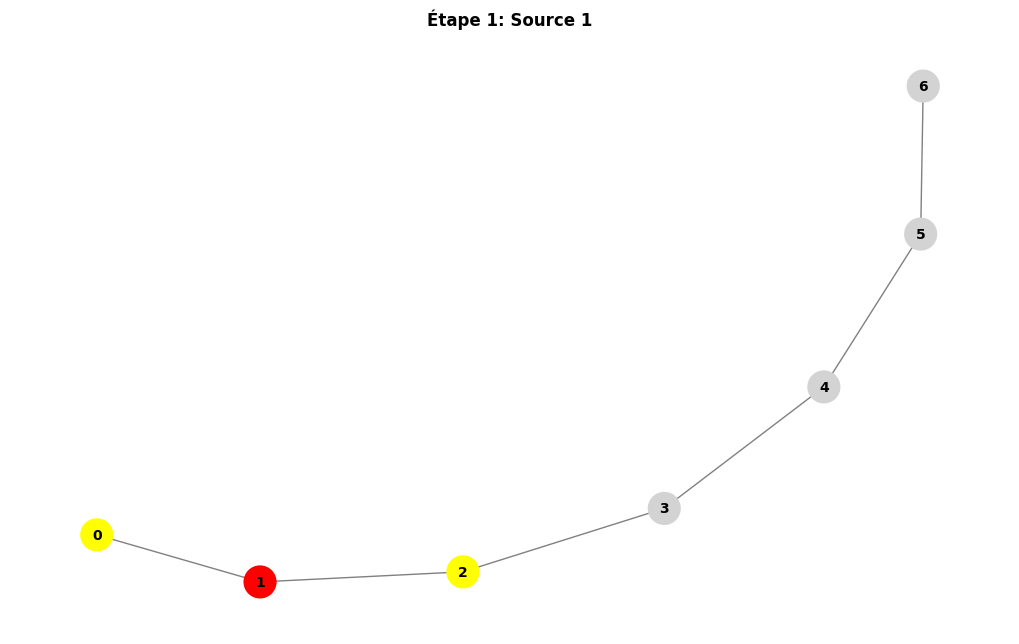

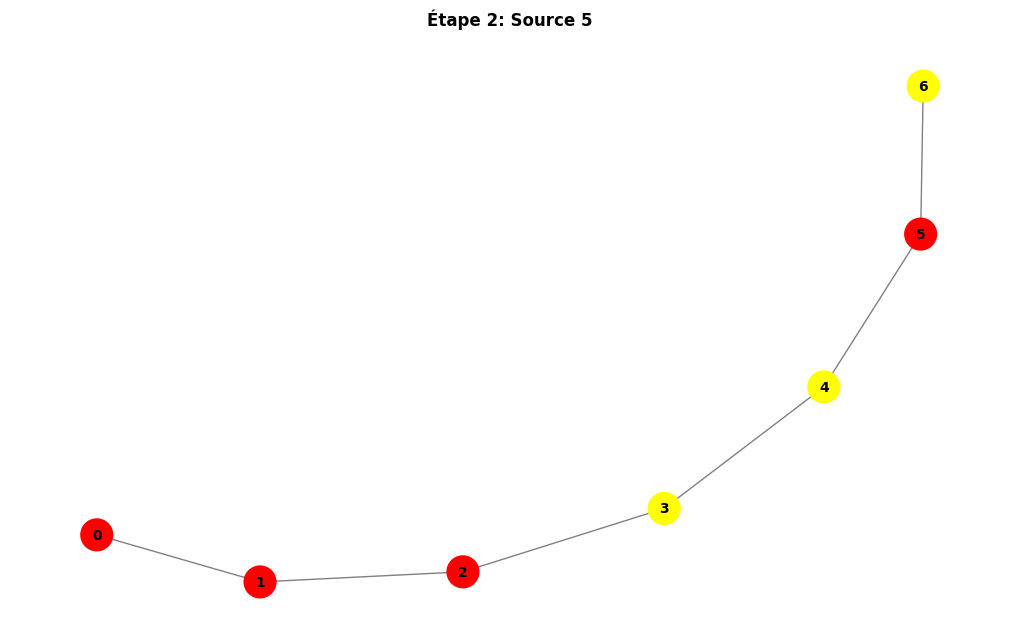

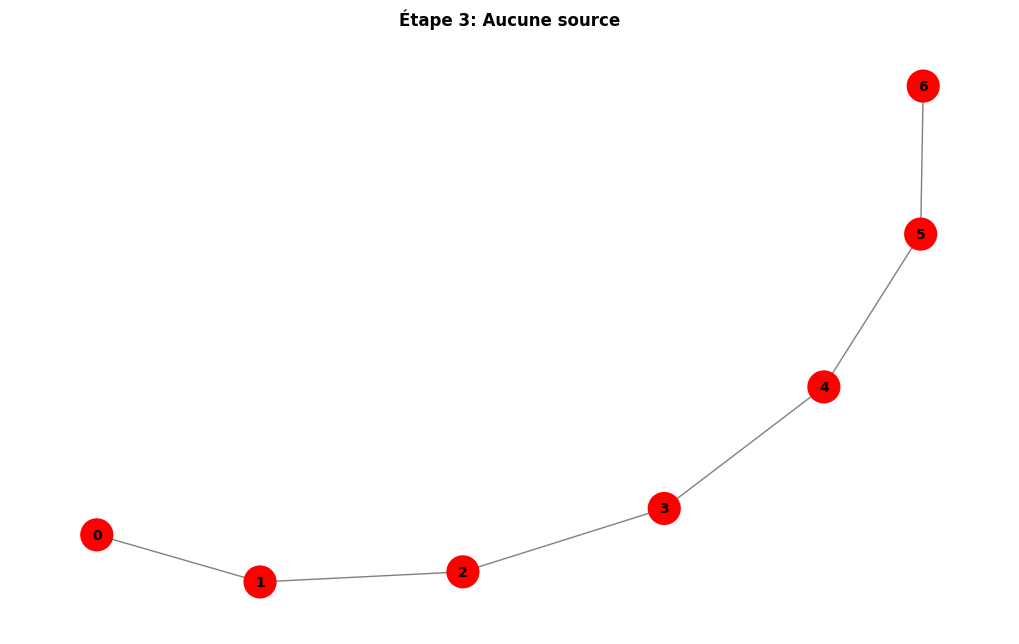

In [27]:
num = 5
#visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], [centre for centre, rayon in df.iloc[num]["Couverture des balles"]])
visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], df.iloc[num]["Recherche Largeur"])